In [1]:
from BlockingTimeSeriesSplit import *
from KFold import *
from RepeatedKFold import *
from RollingWindow import *
from TimeSeriesSplit import *
from sklearn.datasets import *
from Plots.Other_plots import *

Load data

In [2]:
zbior = load_breast_cancer()
data = pd.DataFrame(zbior.data, columns= zbior.feature_names)
data['target'] = pd.Series(zbior.target)
X = data.drop('target', axis=1).values
y = data['target'].values
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


KFold

In [3]:
n_splits = 5
split_plot = Other_Plots()
split_plot.cross_validation_split(X=X, y=y, n_splits=n_splits, cv=KFold(n_splits=n_splits, shuffle=False, stratify=False))

Stratified and shuffled KFold

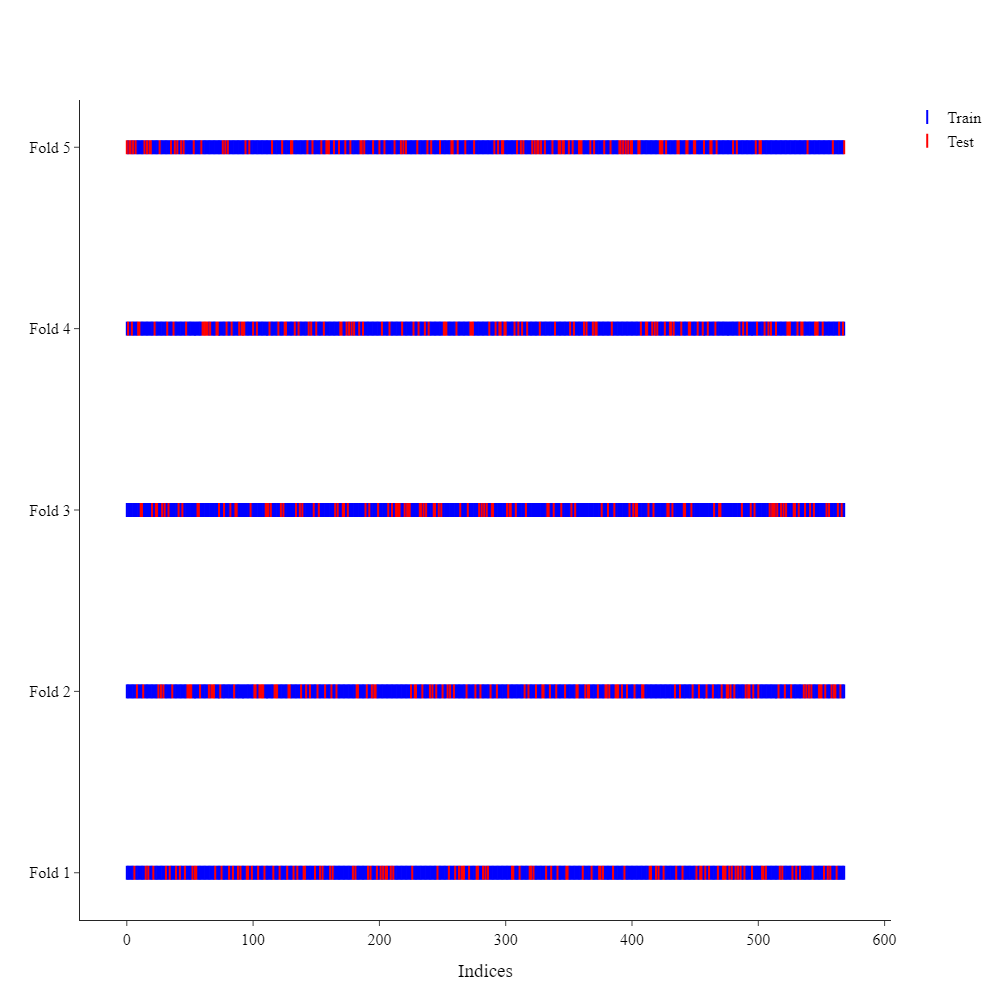

In [ ]:
split_plot.cross_validation_split(X=X, y=y, n_splits=n_splits, cv=KFold(n_splits=n_splits, shuffle=True, stratify=True))

Check whether in each fold we have our target variable splitted equally.

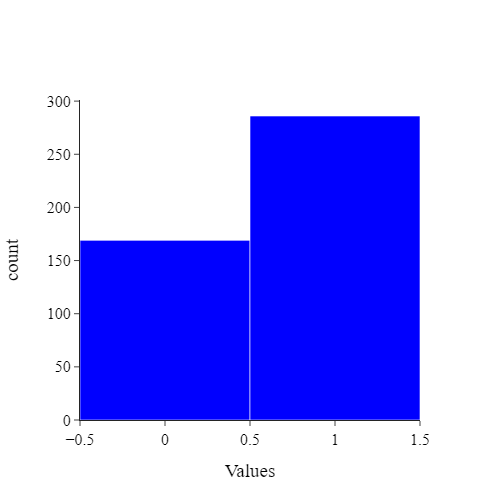

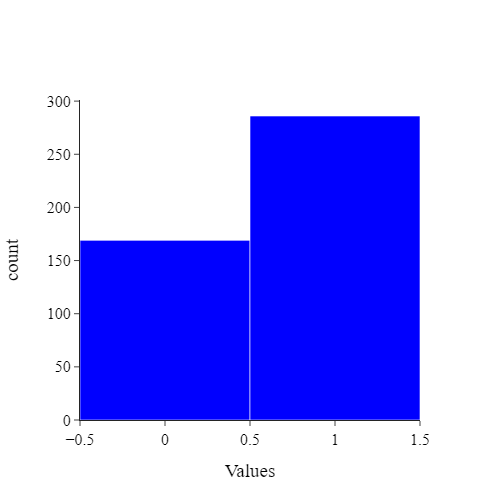

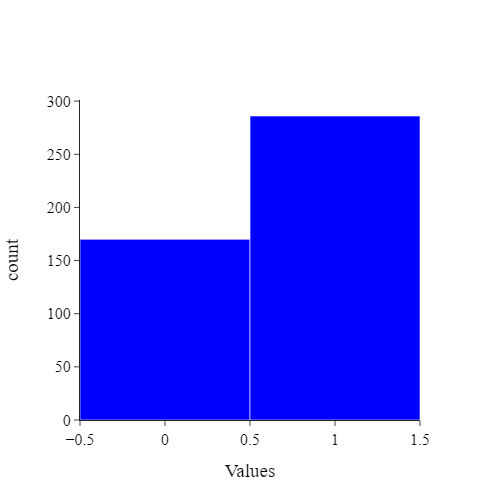

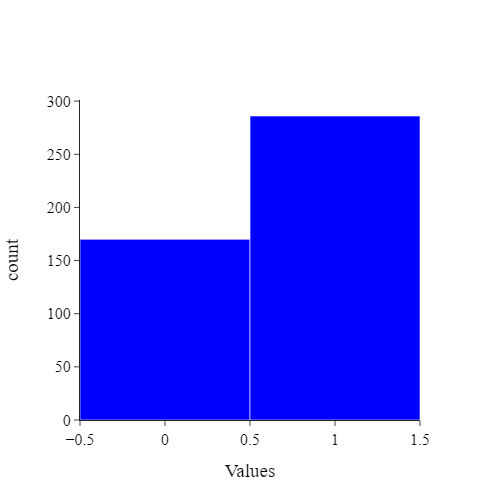

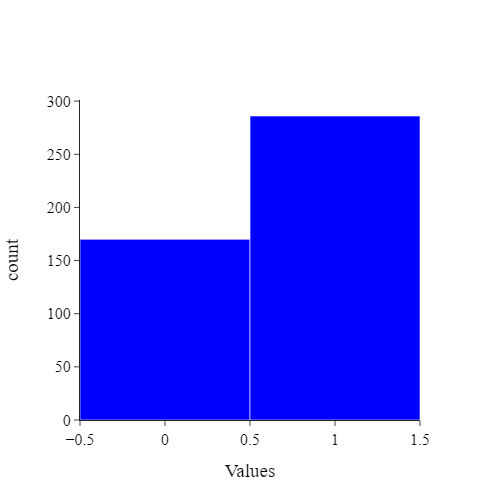

In [ ]:
cv = KFold(n_splits=n_splits, shuffle=True, stratify=True)
for train_idx, test_idx in cv.split(X, y):
    X_copy = X[train_idx, :]
    y_copy = y[train_idx]
    fig = go.Figure()
    fig.add_trace(go.Histogram(x=y_copy, marker_color="blue"))
    fig.update_layout(template="simple_white",  xaxis_title="Values", yaxis_title="count", width=500, height=500, font=dict(family="Times New Roman",size=16,color="Black"), showlegend=False)
    fig.show("png")

As we can see for binary target distribution in each fold is almost identical. 

Now let's check that in the regression problem.

In [ ]:
zbior = load_diabetes()
data = pd.DataFrame(zbior.data, columns= zbior.feature_names)
data['target'] = pd.Series(zbior.target)
X = data.drop('target', axis=1).values
y = data['target'].values
data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


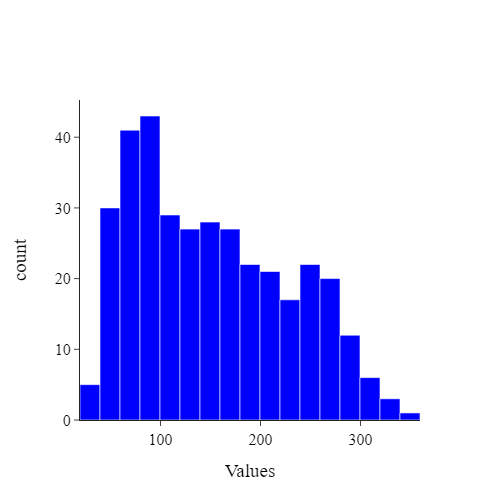

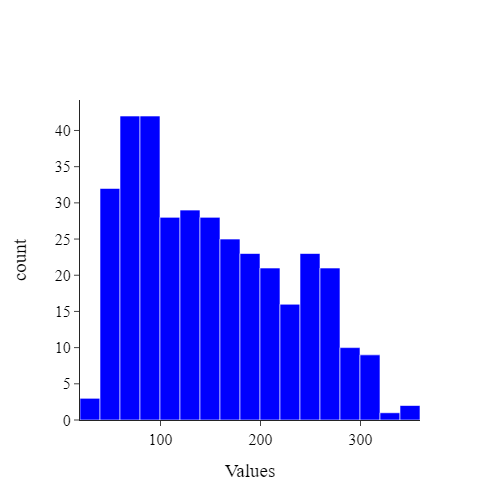

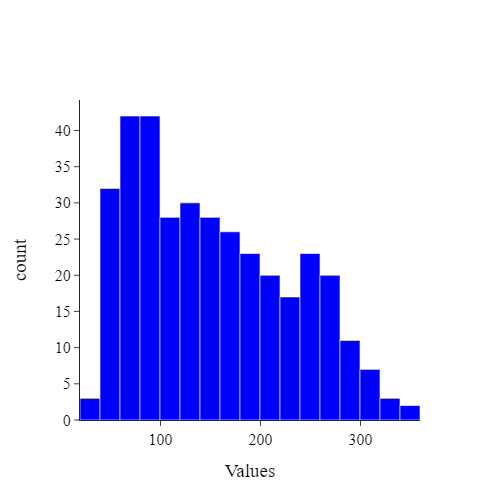

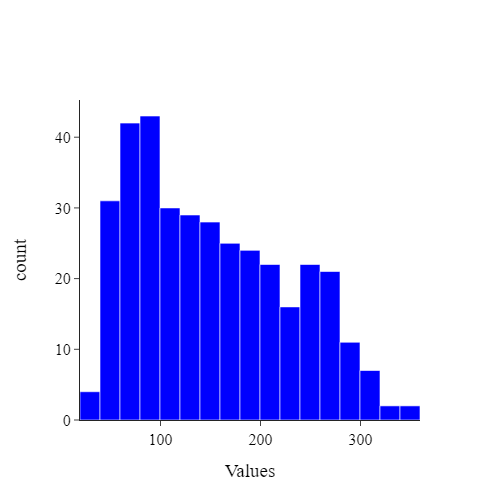

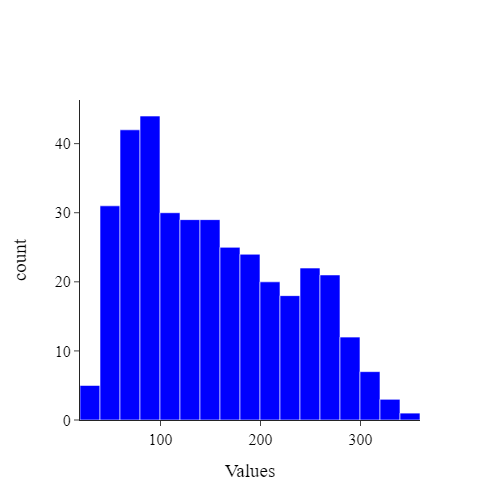

In [ ]:
cv = KFold(n_splits=n_splits, shuffle=True, stratify=True)
for train_idx, test_idx in cv.split(X, y):
    X_copy = X[train_idx, :]
    y_copy = y[train_idx]
    fig = go.Figure()
    fig.add_trace(go.Histogram(x=y_copy, marker_color="blue"))
    fig.update_layout(template="simple_white",  xaxis_title="Values", yaxis_title="count", width=500, height=500, font=dict(family="Times New Roman",size=16,color="Black"), showlegend=False)
    fig.show("png")

Again distribution is almost the same.

RepeatedKFold

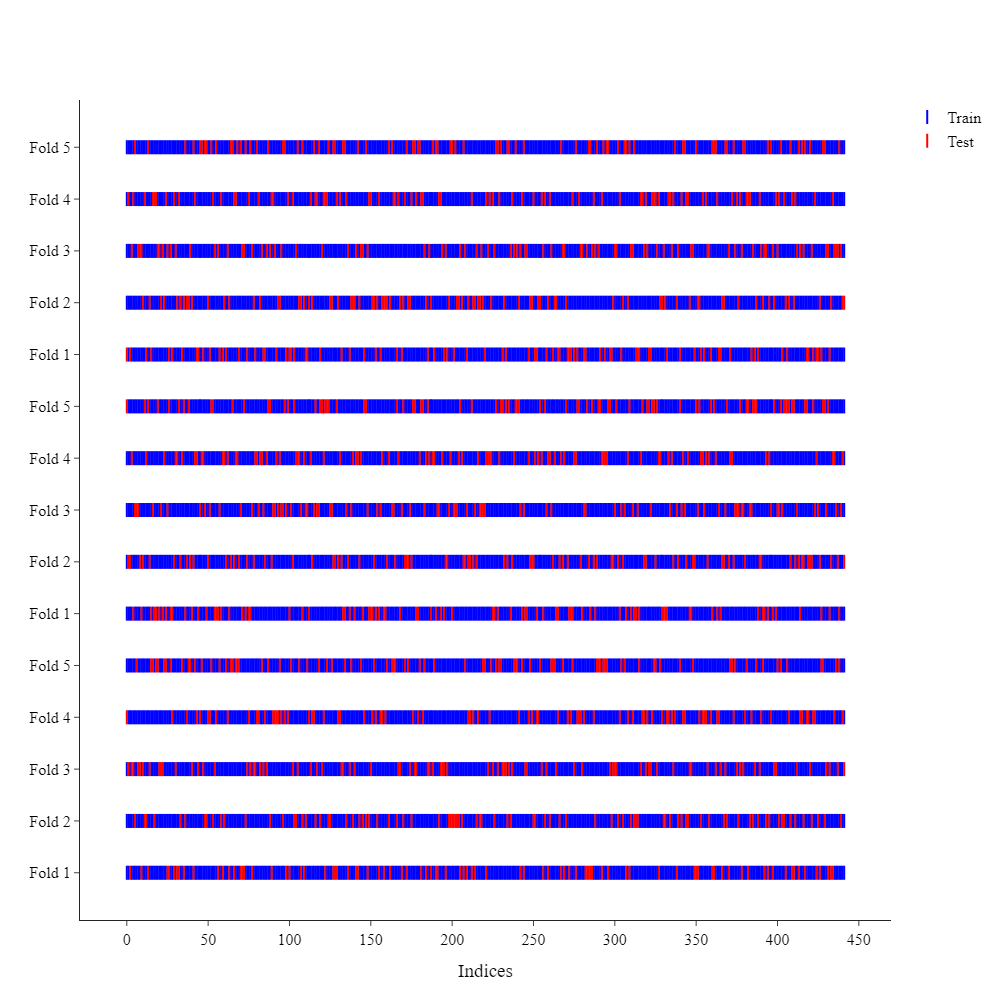

In [ ]:
n_splits = 5
split_plot = Other_Plots()
split_plot.cross_validation_split(X=X, y=y, n_splits=n_splits, cv=RepeatedKFold(n_splits=n_splits, n_repeats=3, stratify=False))

Time Series Split

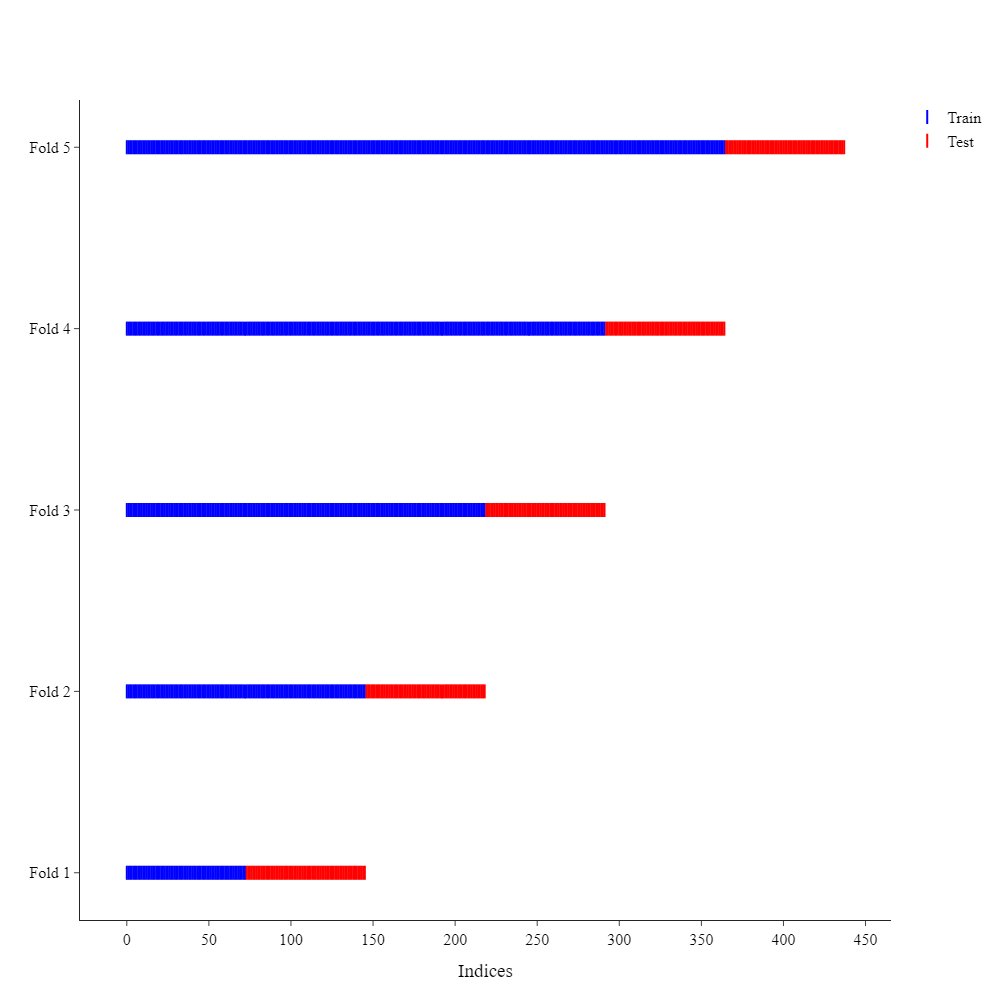

In [ ]:
split_plot.cross_validation_split(X=X, y=y, n_splits=n_splits, cv=Time_Series(n_splits=n_splits))

BlockingTimeSeriesSplit

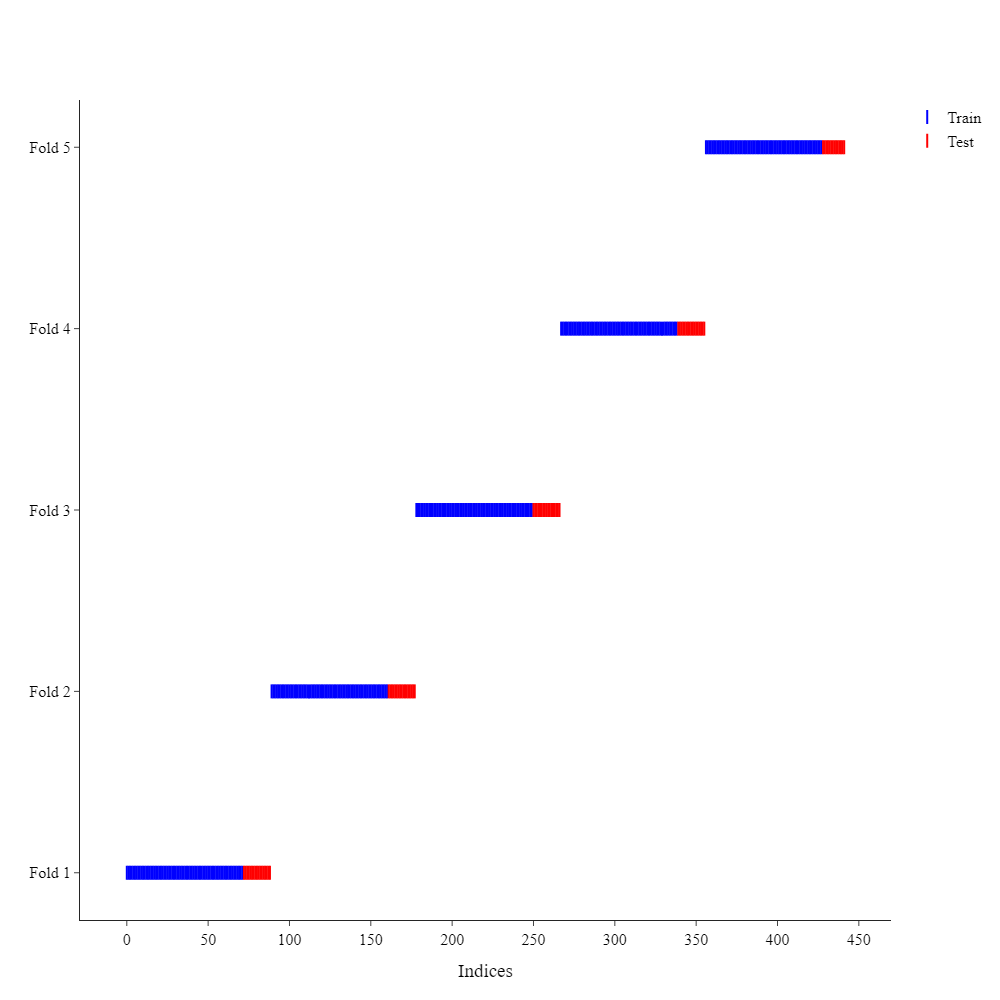

In [ ]:
split_plot.cross_validation_split(X=X, y=y, n_splits=n_splits, cv=BlockingTimeSeriesSplit(n_splits=n_splits))

Rolling Window

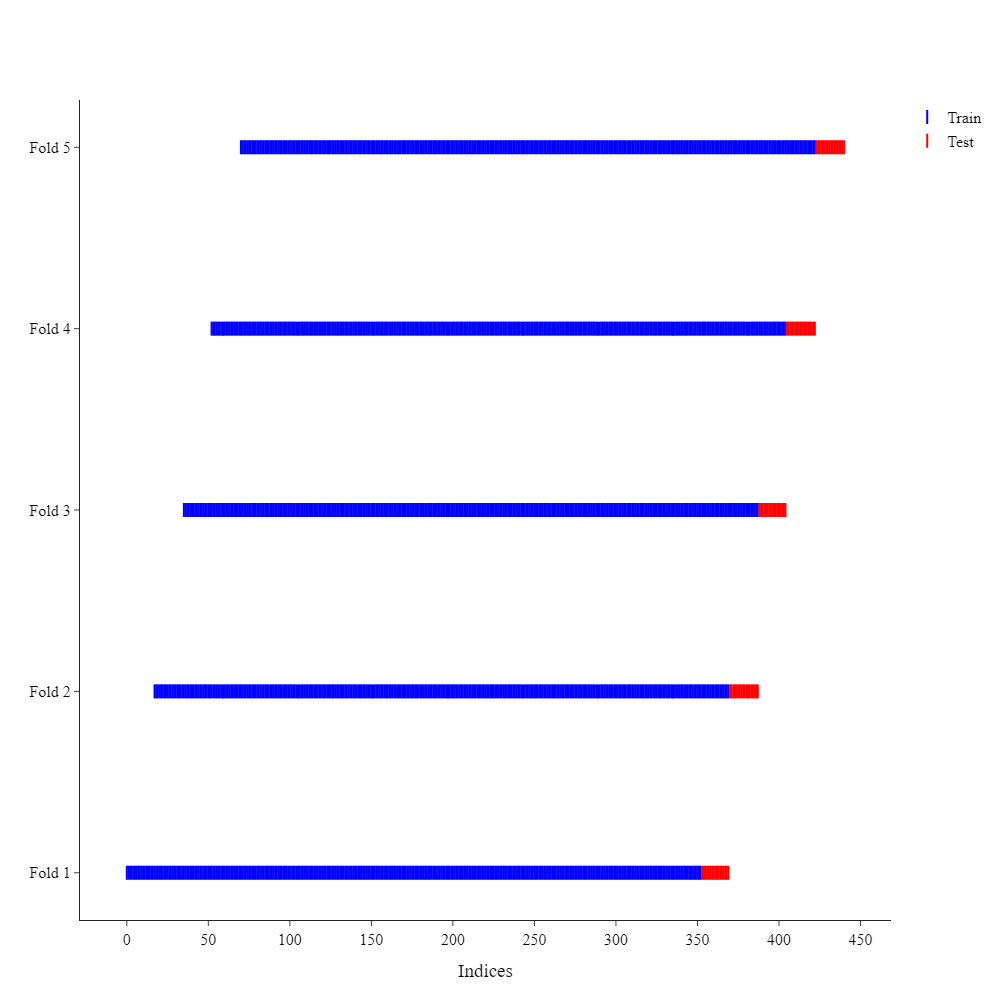

In [ ]:
split_plot.cross_validation_split(X=X, y=y, n_splits=n_splits, cv=Rolling_window(n_splits=n_splits))